# ANLY590 HW0

## Junke Wang

### 1. Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
hitters = pd.read_csv('/Users/kay/original/590/Hitters.csv')
#remove NAs and the categorical columns from the dataset
hitters = hitters.drop(columns=['League', 'Division', 'NewLeague'])
hitters = hitters.drop(hitters.columns[0], axis=1)
hitters = hitters.dropna()
print(hitters[:5])

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0  


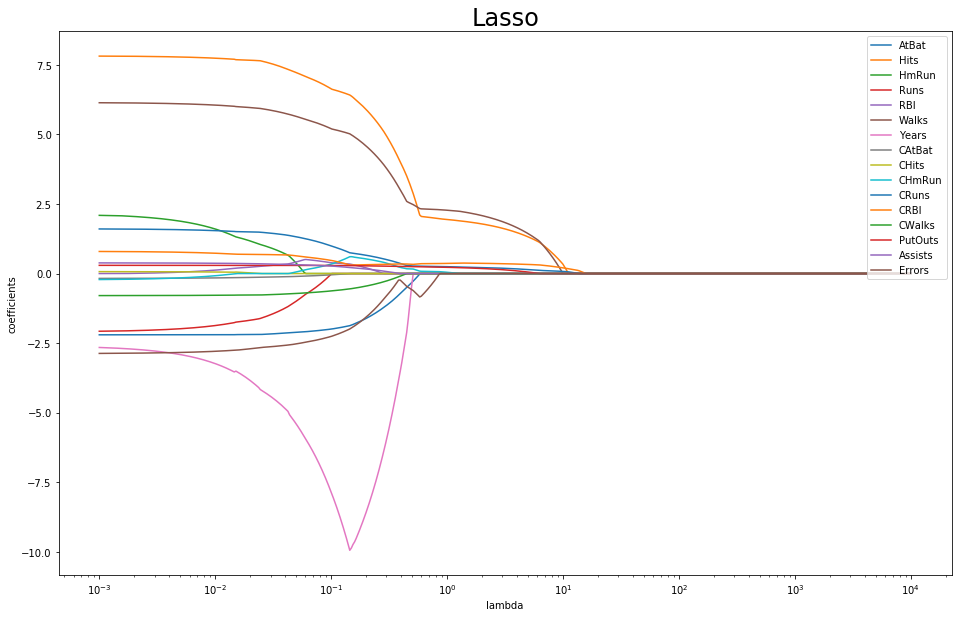

In [3]:
#set the every columns except 'Salary' for predictors
X = hitters.drop(columns = ['Salary'])
Y = hitters.Salary

#set a sequence of 500 alphas from 0.001 to 10000
lambdas = np.logspace(-3, 4, 500)
#set the lasso model with max iteration of 10000 and always normalize
lasso = Lasso(max_iter = 10000, normalize = True)
#set an empty list for the coefficients with different alphas. 
#It should be a 500*16 list after the for loop
stndrdzd_coef_lasso = []
for lam in lambdas:
    lasso.set_params(alpha=lam)
    lasso.fit(X, Y)
    stndrdzd_coef_lasso.append(lasso.coef_)

#draw the graph
plt.figure(figsize=(16,10))
plot_lasso = plt.gca()
plot_lasso.plot(lambdas, stndrdzd_coef_lasso)
plot_lasso.set_xscale('log')
plt.title('Lasso', fontsize=24)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.legend(list(X), loc=1)
plt.show()

In [4]:
#perform a cross validation and get the optimal value of the regularization penality
lasso_cv = LassoCV(alphas = None, max_iter = 10000, normalize = True, cv = 10)
lasso_cv.fit(X, Y)
print('The optimal value of the regularization penality is', round(lasso_cv.alpha_, 3))

The optimal value of the regularization penality is 0.064


From the graph, we can see there are three or four predictors left when lambda is around 10, so we first try 10 as our alpha and print out all the coefficients. 

In [5]:
lasso_lambda10 = Lasso(alpha = 10, max_iter = 10000, normalize = True)
lasso_lambda10.fit(X,Y)
print([(list(X)[i], lasso_lambda10.coef_[i]) for i in range(16)])

[('AtBat', 0.0), ('Hits', 0.32947458556868225), ('HmRun', 0.0), ('Runs', 0.0), ('RBI', 0.0), ('Walks', 0.0), ('Years', 0.0), ('CAtBat', 0.0), ('CHits', 0.0), ('CHmRun', 0.0), ('CRuns', 0.076321968528941644), ('CRBI', 0.20447491636853793), ('CWalks', 0.0), ('PutOuts', 0.0), ('Assists', 0.0), ('Errors', 0.0)]


From the list of coefficients when lambda is 10, we can see that there are only three variables with non-zero coefficients. They are Hits, CRuns and CRBI. 

In [6]:
#Build the lasso regression with optimal alpha and print out all the coefficients. 
lasso_lambdaOpt = Lasso(alpha = lasso_cv.alpha_, max_iter = 10000, normalize = True)
lasso_lambdaOpt.fit(X,Y)
print([(list(X)[i], lasso_lambdaOpt.coef_[i]) for i in range(16)])

[('AtBat', -2.0829536873504022), ('Hits', 7.0410106558424657), ('HmRun', 0.0), ('Runs', -0.68261511563402022), ('RBI', 0.496551581922972), ('Walks', 5.5117806296603238), ('Years', -6.1076250598435164), ('CAtBat', -0.087065745958843574), ('CHits', 0.0), ('CHmRun', 0.1564675214255995), ('CRuns', 1.2280611481271844), ('CRBI', 0.58382083894271752), ('CWalks', -0.69060050647791238), ('PutOuts', 0.29269418970565531), ('Assists', 0.30437222627550786), ('Errors', -2.4507947035865318)]


All the predictors except HmRun and CHits have non-zero coefficients, so there are 14 predictors left in that model. 

In [7]:
#split the dataset into train sets and test sets
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
#select lambda = 0.01, which is smaller than the optimal one, as a comparison. 
lasso_lambda001 = Lasso(alpha = 0.01, max_iter = 10000, normalize = True)
lasso_lambda001.fit(X_train, Y_train)
lasso_lambdaOpt.fit(X_train, Y_train)
lasso_lambda10.fit(X_train, Y_train)

#print out the train errors and test errors in three models. 
print('lambda\t\tlambda = 0.01\tlambda = optimal\tlambda = 10\ntrain error\t', 
      round(mean_squared_error(Y_train, lasso_lambda001.predict(X_train)),3), '\t', 
      round(mean_squared_error(Y_train, lasso_lambdaOpt.predict(X_train)),3), '\t\t', 
      round(mean_squared_error(Y_train, lasso_lambda10.predict(X_train)),3), '\ntest error\t', 
      round(mean_squared_error(Y_test, lasso_lambda001.predict(X_test)),3), '\t', 
      round(mean_squared_error(Y_test, lasso_lambdaOpt.predict(X_test)),3), '\t\t', 
      round(mean_squared_error(Y_test, lasso_lambda10.predict(X_test)),3))

lambda		lambda = 0.01	lambda = optimal	lambda = 10
train error	 97057.735 	 97543.623 		 155550.103 
test error	 100521.948 	 98373.618 		 113587.043


Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.

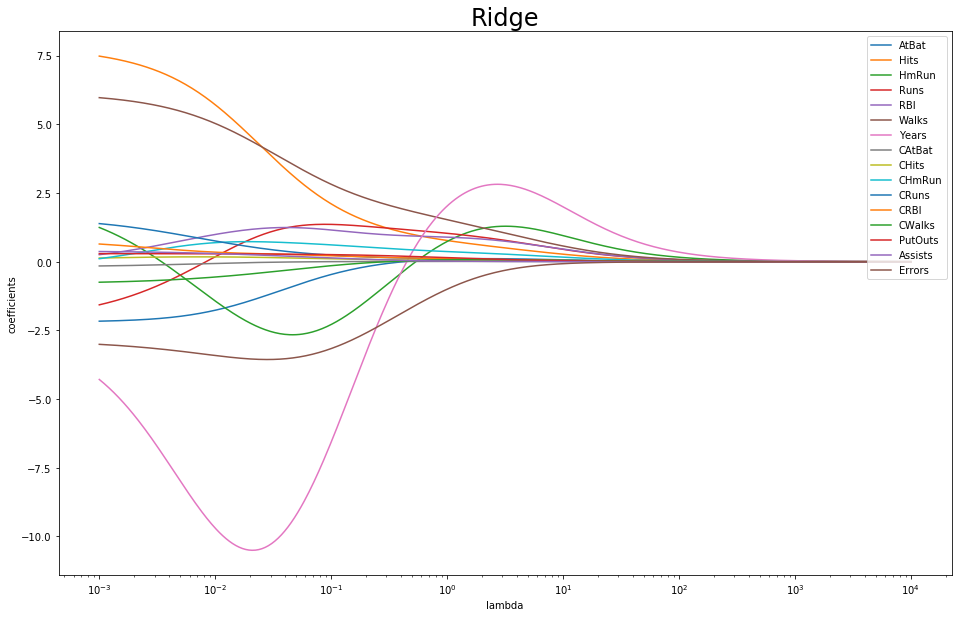

In [8]:
#set the ridge model with max iteration of 10000 and always normalize
ridge = Ridge(max_iter = 10000, normalize = True)
#set an empty list for the coefficients with different alphas. 
stndrdzd_coef_ridge = []
for lam in lambdas:
    ridge.set_params(alpha=lam)
    ridge.fit(X, Y)
    stndrdzd_coef_ridge.append(ridge.coef_)

#draw the graph
plt.figure(figsize=(16,10))
plot_ridge = plt.gca()
plot_ridge.plot(lambdas, stndrdzd_coef_ridge)
plot_ridge.set_xscale('log')
plt.title('Ridge', fontsize=24)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.legend(list(X), loc=1)
plt.show()

In [9]:
#perform a cross validation and get the optimal value of the regularization penality
ridge_cv = RidgeCV(alphas = lambdas, normalize = True, cv = 10)
ridge_cv.fit(X, Y)
print('The optimal value of the regularization penality is', round(ridge_cv.alpha_, 3))

The optimal value of the regularization penality is 0.973


In [10]:
ridge_lambdaOpt = Ridge(alpha = ridge_cv.alpha_, max_iter = 10000, normalize = True)
ridge_lambdaOpt.fit(X,Y)
print([(list(X)[i], ridge_lambdaOpt.coef_[i]) for i in range(16)])

[('AtBat', 0.092273554334548563), ('Hits', 0.78095997129832095), ('HmRun', 0.71025508442282115), ('Runs', 1.0406169047702951), ('RBI', 0.89787314488760994), ('Walks', 1.5429759001662036), ('Years', 1.9801084331167687), ('CAtBat', 0.01125659874804453), ('CHits', 0.05320394985515127), ('CHmRun', 0.37201687724573401), ('CRuns', 0.10715995894373534), ('CRBI', 0.110831211051792), ('CWalks', 0.066374701532380995), ('PutOuts', 0.15050072232785494), ('Assists', 0.025444363746315438), ('Errors', -1.0232857054892548)]


The coefficients with the optimal alpha is shown above. 

In [11]:
#lambda = 0.01 and 10 as a comparison. 
ridge_lambda001 = Ridge(alpha = 0.01, max_iter = 10000, normalize = True)
ridge_lambda001.fit(X_train, Y_train)
ridge_lambdaOpt.fit(X_train, Y_train)
ridge_lambda10 = Ridge(alpha = 10, max_iter = 10000, normalize = True)
ridge_lambda10.fit(X_train, Y_train)

#print out the train errors and test errors in three models. 
print('lambda\t\tlambda = 0.01\tlambda = optimal\tlambda = 10\ntrain error\t', 
      round(mean_squared_error(Y_train, ridge_lambda001.predict(X_train)),3), '\t', 
      round(mean_squared_error(Y_train, ridge_lambdaOpt.predict(X_train)),3), '\t\t', 
      round(mean_squared_error(Y_train, ridge_lambda10.predict(X_train)),3), '\ntest error\t', 
      round(mean_squared_error(Y_test, ridge_lambda001.predict(X_test)),3), '\t', 
      round(mean_squared_error(Y_test, ridge_lambdaOpt.predict(X_test)),3), '\t\t', 
      round(mean_squared_error(Y_test, ridge_lambda10.predict(X_test)),3))

lambda		lambda = 0.01	lambda = optimal	lambda = 10
train error	 98884.215 	 120332.666 		 154427.148 
test error	 96624.866 	 87899.889 		 108060.829


### 2. Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

The bias-variance tradeoff is a statistics phenomenon where higher variance is associated with lower bias and higher bias is associated with lower variance. When the variance increases, it generally means there is more chance for overfitting to exist. Overfitting would reduce bias which at most time is the training error, but largely increase the test error, and vice versa. At some point, the bia and variance would reach a balance where the test MSE reaches the lowest, which is what we are trying to achieve. 

In problem 1, three different lambda values (0.01, optimal, 10) were chosen in both lasso and ridge models. For both types, there is a  printed table of their train errors and test errors. As we can see, in both cases, when the lambda becomes larger, there are less predictors in the models that have large influence to the outcome. In this way, the variance is reduced and the bias is increasing. We can prove this because the train errors are increasing as lambda increases in both lasso and ridge. When the models have the optimal lambda, they reaches the balance point of variance and bia, and therefore they have the lowest test MSE. 

As a result, the regulatization plays a role in tradeoff as reducing the variance in order to find the parameter with the lowest test MSE. 